In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle as pkl
import m2cgen

# Data cleaning

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,spelling_accuracy,gramatical_accuracy,percentage_of_corrections,percentage_of_phonetic_accuraccy,presence_of_dyslexia
0,90.000000,98.130841,13.043478,92.025391,1
1,92.682927,99.375000,16.216216,95.264264,1
2,50.000000,50.000000,0.000000,61.454545,1
3,90.604027,99.312715,13.559322,93.846297,1
4,92.753623,97.058824,13.333333,94.569697,1


In [4]:
x_train = train_data.drop(["presence_of_dyslexia"], axis= "columns")
x_test = test_data.drop(["presence_of_dyslexia"], axis= "columns")
y_train = train_data.presence_of_dyslexia
y_test = test_data.presence_of_dyslexia

# Training a Logistic regression Model

In [5]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print(model_logistic.score(x_test, y_test))
print(model_logistic.score(x_train,y_train))

0.85
0.975


<Axes: >

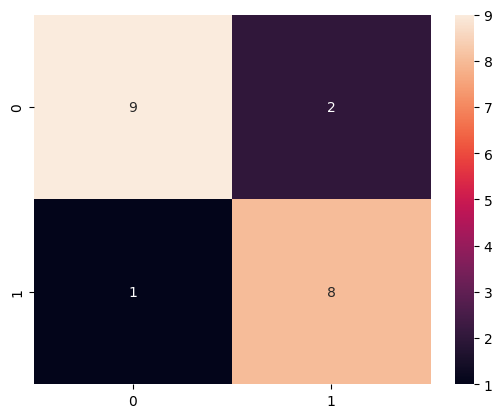

In [6]:
sns.heatmap(confusion_matrix(model_logistic.predict(x_test), y_test), annot=True)

<AxesSubplot:>

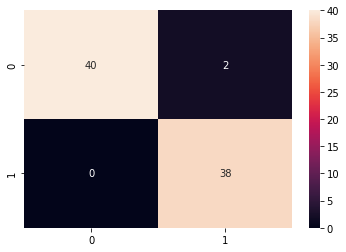

In [6]:
sns.heatmap(confusion_matrix(model_logistic.predict(x_train), y_train), annot=True)

# Training a Decision Tree classifier

In [7]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
print(model_DT.score(x_test, y_test))
print(model_DT.score(x_train, y_train))

0.95
1.0


<Axes: >

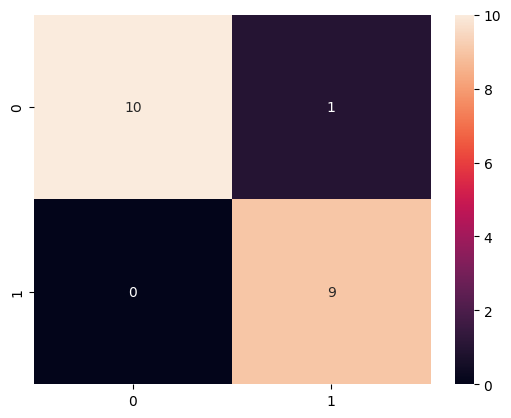

In [9]:
sns.heatmap(confusion_matrix(model_DT.predict(x_test), y_test), annot=True)

<Axes: >

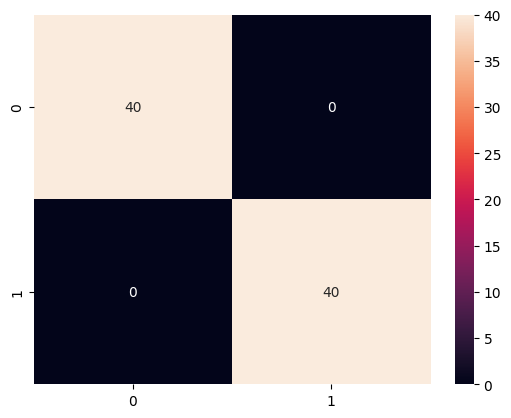

In [10]:
sns.heatmap(confusion_matrix(model_DT.predict(x_train), y_train), annot=True)

# Training A Linear support vector machine

In [11]:
model_svc_linear = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
model_svc_linear.fit(x_train, y_train)

SVC(kernel='linear', shrinking=False)

In [12]:
print(model_svc_linear.score(x_test, y_test))
print(model_svc_linear.score(x_train, y_train))

0.85
0.975


# Exporting the best model

### from the above models the Descision tree classifier performed the best.  

In [13]:
pkl.dump(model_DT, open("Decision_tree_model.sav", 'wb'))